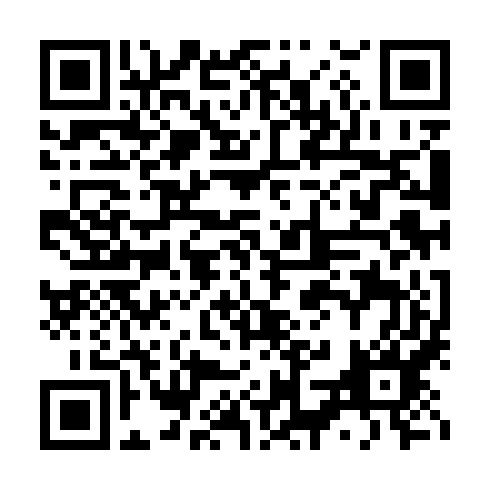

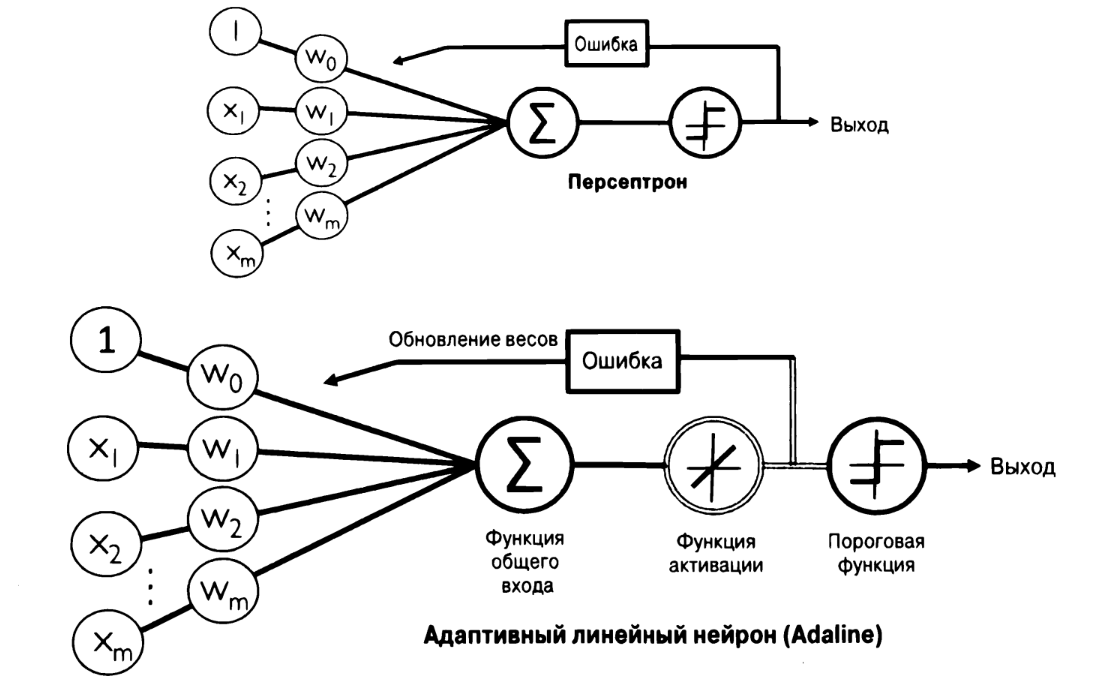

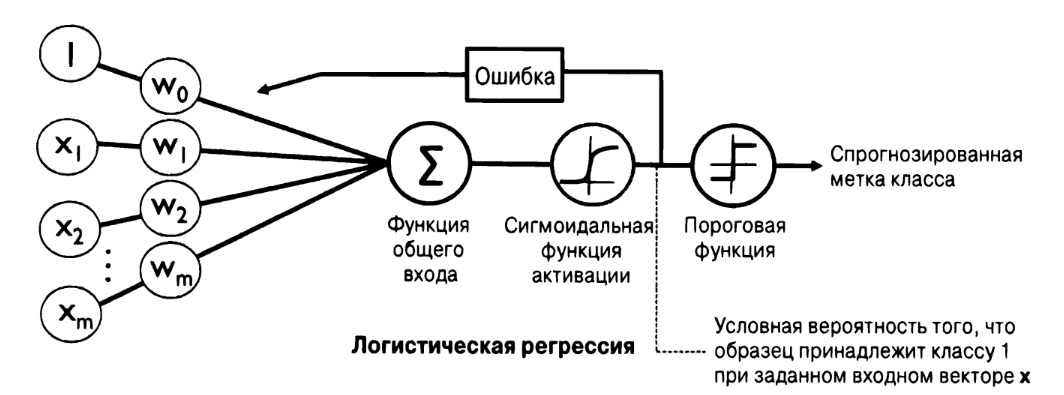

playground.tensorflow.org

In [ ]:
# импортируем модуль pandas c псевдонимом pd
import pandas as pd
# Читаем значения в датафрейм df  из CSV  таблицы, по умолчанию разделитель ","
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None )
#help(pd.read_csv) # Если хотите посмотреть все параметры
# показываем последние 10 значений фрейма для наглядности
df.tail(10)

,0,1,2,3,4
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Iris-setosa
0


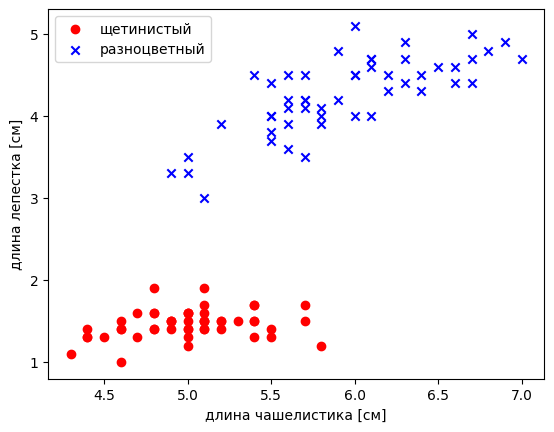

In [ ]:
#импортируем pyplot для визуализации и numpy для работы с векторами.
import matplotlib.pyplot as plt
import numpy as np
# выбираем из датафрейма первые 100 записей целевой переменной - ирис щетинистый и ирис разноцветный
y = df.iloc[0:100, 4].values
print(y[0])
# заменяем текстовые значения, значениями области определения функции активации персептрона (-1 и 1)
y = np.where(y == 'Iris-setosa',0, 1)
print(y[0])

# Извлекаем значения длинны чашелистика и длинны лепестка (столбцы 0 и 2)
X = df.iloc[0:100,[0,2]].values

# Вычерчиваем график
# первые 50 значений из выборки - ирис цетинистый
plt.scatter(X[:50,0],X[:50,1],
            color = 'red', marker = 'o', label = 'щетинистый')
# c 50 по 100 значение - ирис разноцветный
plt.scatter(X[50:100, 0],X[50:100, 1],
            color = 'blue', marker = 'x', label = 'разноцветный')
plt.xlabel('длина чашелистика [см]')
plt.ylabel('длина лепестка [см]')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Сделаем красивую визуализацию
from matplotlib.colors import ListedColormap
# Создадим метод, который красиво визуализирует разделенные классы
# X - обучающая выборка y - целевые значения
# classifier - классификатор, наш персептрон
def plot_decision_regions(X,y,classifier, resolution = 0.2):
  # типы маркеров для графика
  markers = ('s','x','o','^','v')
  # очевидно цвета
  colors = ('red','blue','lightgreen','gray','cyan')

  cmap = ListedColormap(colors[:len(np.unique(y))])
  x1_min , x1_max = X[:,0].min()-1, X[:,0].max() + 1
  x2_min , x2_max = X[:,1].min()-1, X[:,1].max() + 1
  xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                        np.arange(x2_min,x2_max,resolution))
  Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
  plt.xlim(xx1.min(),xx1.max())
  plt.ylim(xx2.min(),xx2.max())
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y==cl,0],
                y=X[y==cl,1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=cl,
                edgecolor='black')

In [ ]:
import numpy as np

class LogisticRegressionGD(object):
  def __init__(self, eta = 0.05, n_iter = 100, random_state = 1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self,X,y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc= 0.0, scale = 0.01, size = 1 + X.shape[1])
    self.cost_= []

    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_[1:] += self.eta*X.T.dot(errors)
      self.w_[0] += self.eta* errors.sum()
      cost = (-y.dot(np.log(output))-((1-y).dot(np.log(1- output))))
      self.cost_.append(cost)
    return self

  def net_input(self,X):
    return np.dot(X, self.w_[1:])+ self.w_[0]

  def activation(self,z):
    return 1. / (1. + np.exp(-np.clip(z,-250,250)))

  def predict(self,X):
    return np.where(self.net_input(X) >= 0.0, 1, 0)


In [ ]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean())/X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean())/X[:,1].std()

ppn = LogisticRegressionGD(eta = 0.05 , n_iter = 10)
# Обучаем персптрон на данных ирисов
ppn.fit(X_std,y)


<ipython-input-4-1c1c49579794>:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],


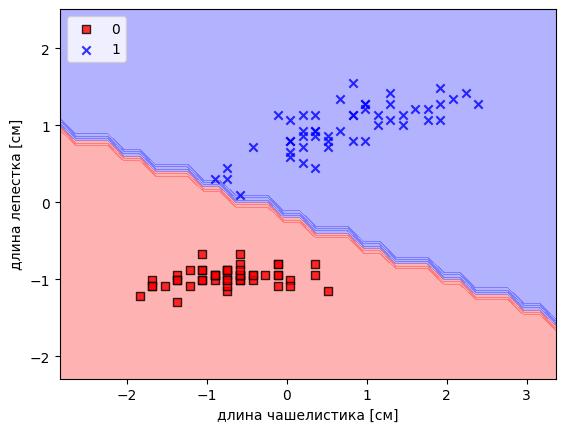

In [ ]:
plot_decision_regions(X_std,y, classifier=ppn)
plt.xlabel('длина чашелистика [см]')
plt.ylabel('длина лепестка [см]')
plt.legend(loc='upper left')
plt.show()

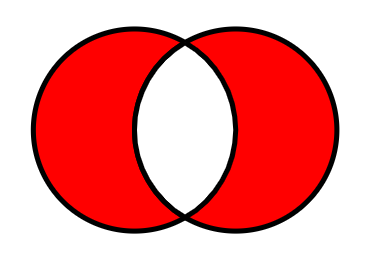

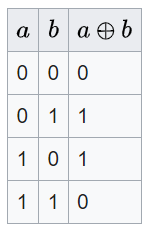

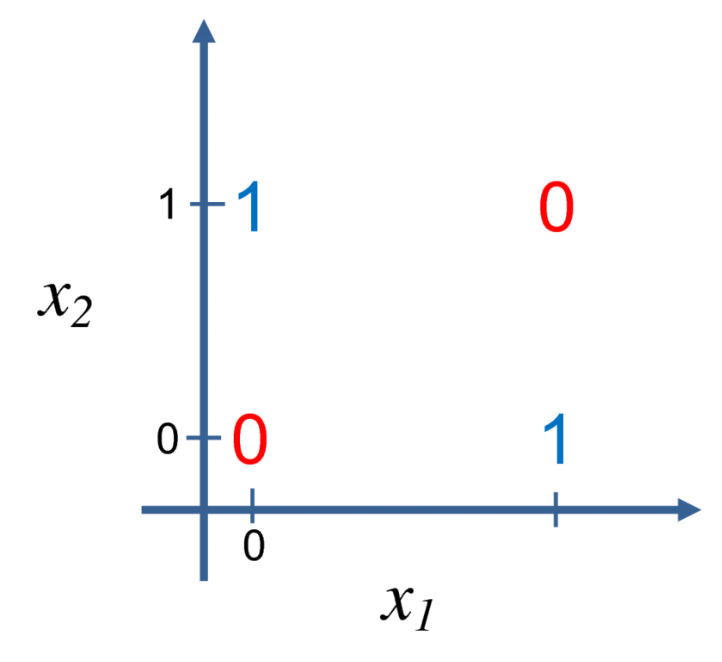

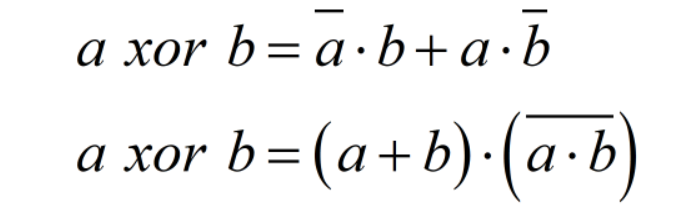

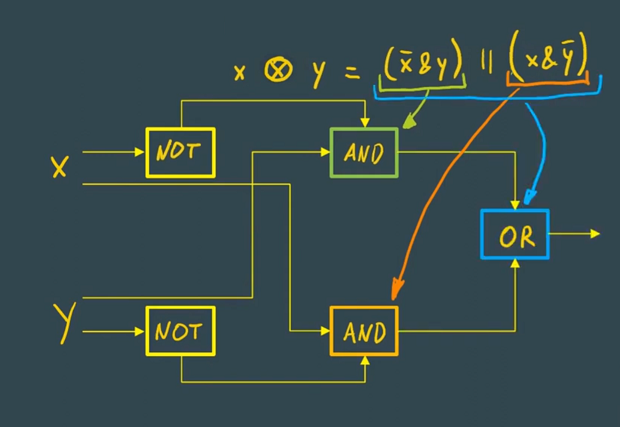

playground.tensorflow.org

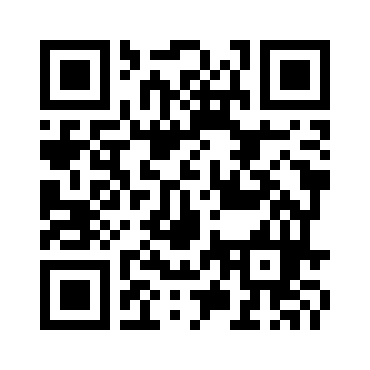

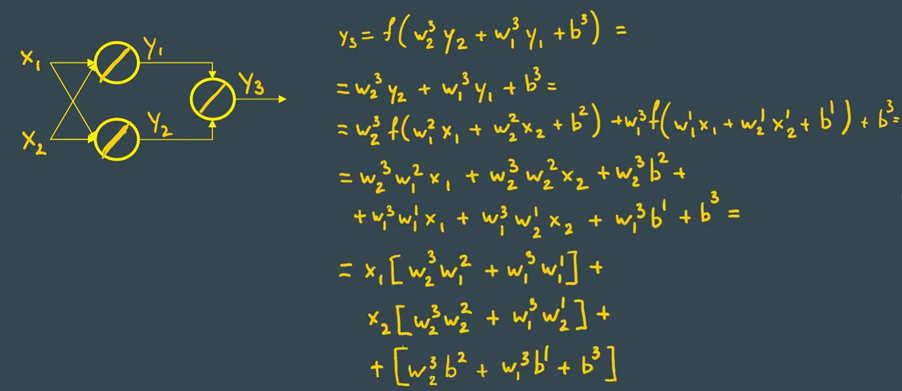